In [53]:
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
ruta_carpeta = "data\dataset_tripadvisor-scraper_2024-06-12_17-49-14-591 (1).csv"
df = pd.read_csv(ruta_carpeta)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6871 entries, 0 to 6870
Data columns (total 76 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   cuisines/items/0/tag/localizedName             5454 non-null   object 
 1   cuisines/items/1/tag/localizedName             4122 non-null   object 
 2   cuisines/items/2/tag/localizedName             2542 non-null   object 
 3   cuisines/items/3/tag/localizedName             1377 non-null   object 
 4   cuisines/items/4/tag/localizedName             675 non-null    object 
 5   cuisines/items/5/tag/localizedName             312 non-null    object 
 6   cuisines/items/6/tag/localizedName             120 non-null    object 
 7   cuisines/items/7/tag/localizedName             22 non-null     object 
 8   cuisines/items/8/tag/localizedName             5 non-null      object 
 9   cuisines/items/9/tag/localizedName             3 non

Analizamos todas las columnas para limpiar el df, viendo las que son similares juntas

Comenzamos con las que dicen "cuisine"   

A cuisine is a specific set of cooking traditions and practices, often associated with a specific culture or region. Each cuisine involves food preparation in a particular style, of food and drink of particular types, to produce individually consumed items or distinct meals.

In [56]:
df[['cuisines/items/0/tag/localizedName',
       'cuisines/items/1/tag/localizedName',
       'cuisines/items/2/tag/localizedName',
       'cuisines/items/3/tag/localizedName',
       'cuisines/items/4/tag/localizedName',
       'cuisines/items/5/tag/localizedName',
       'cuisines/items/6/tag/localizedName',
       'cuisines/items/7/tag/localizedName', 'cuisines/items/8/tag/localizedName',
       'cuisines/items/9/tag/localizedName',
       'cuisines/items/10/tag/localizedName']].head()

,cuisines/items/0/tag/localizedName,cuisines/items/1/tag/localizedName,cuisines/items/2/tag/localizedName,cuisines/items/3/tag/localizedName,cuisines/items/4/tag/localizedName,cuisines/items/5/tag/localizedName,cuisines/items/6/tag/localizedName,cuisines/items/7/tag/localizedName,cuisines/items/8/tag/localizedName,cuisines/items/9/tag/localizedName,cuisines/items/10/tag/localizedName
0,Grill,Argentinean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Steakhouse,Barbecue,Grill,Argentinean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Steakhouse,Grill,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bar,International,Deli,Contemporary,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Italian,French,European,Sardinian,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Las de localized name parecen contenter las categorias que se le asignaron al restaurante según la comida que sirven, vamos a agruparlas en una sola.

In [57]:
columns_to_combine = [
    'cuisines/items/0/tag/localizedName',
    'cuisines/items/1/tag/localizedName',
    'cuisines/items/2/tag/localizedName',
    'cuisines/items/3/tag/localizedName',
    'cuisines/items/4/tag/localizedName',
    'cuisines/items/5/tag/localizedName',
    'cuisines/items/6/tag/localizedName',
    'cuisines/items/7/tag/localizedName','cuisines/items/8/tag/localizedName',
       'cuisines/items/9/tag/localizedName',
       'cuisines/items/10/tag/localizedName'
]

# Combina las columnas en una sola lista, excluyendo los valores NaN
df['cuisines'] = df[columns_to_combine].apply(lambda row: [item for item in row if pd.notna(item)], axis=1)

# Elimina las columnas originales si ya no las necesitas
df.drop(columns=columns_to_combine, inplace=True)

In [58]:
df[['establishmentTypes/items/0/id',
       'establishmentTypes/items/0/tag/localizedName',
       'establishmentTypes/items/1/id',
       'establishmentTypes/items/1/tag/localizedName',
       'establishmentTypes/items/2/id',
       'establishmentTypes/items/2/tag/localizedName',
       'establishmentTypes/items/3/id',
       'establishmentTypes/items/3/tag/localizedName']].sort_values('establishmentTypes/items/3/tag/localizedName').head()

,establishmentTypes/items/0/id,establishmentTypes/items/0/tag/localizedName,establishmentTypes/items/1/id,establishmentTypes/items/1/tag/localizedName,establishmentTypes/items/2/id,establishmentTypes/items/2/tag/localizedName,establishmentTypes/items/3/id,establishmentTypes/items/3/tag/localizedName
203,9900.0,Coffee & Tea,9901.0,Bakeries,9909.0,Dessert,16556.0,Quick Bites
4625,9900.0,Coffee & Tea,9901.0,Bakeries,16548.0,Specialty Food Market,16556.0,Quick Bites
0,10591.0,Restaurants,NaN,NaN,NaN,NaN,NaN,NaN
1,10591.0,Restaurants,NaN,NaN,NaN,NaN,NaN,NaN
2,10591.0,Restaurants,NaN,NaN,NaN,NaN,NaN,NaN


Las columnas de establishmentTypes y sus respectivos ids indica qué tipo de lugar. Las de ids las borramos y las otras las unificamos.

In [59]:
df.drop(columns=['establishmentTypes/items/0/id',
       'establishmentTypes/items/1/id',
       'establishmentTypes/items/2/id',
       'establishmentTypes/items/3/id'], inplace=True)

In [60]:
columns_to_combine = [
       'establishmentTypes/items/0/tag/localizedName',
       'establishmentTypes/items/1/tag/localizedName',
       'establishmentTypes/items/2/tag/localizedName',
       'establishmentTypes/items/3/tag/localizedName'
]

# Combina las columnas en una sola lista, excluyendo los valores NaN
df['establishmentTypes'] = df[columns_to_combine].apply(lambda row: [item for item in row if pd.notna(item)], axis=1)

# Elimina las columnas originales si ya no las necesitas
df.drop(columns=columns_to_combine, inplace=True)

Vamos con las siguientes por más de que no tengan tanta relación

In [61]:
df[['name', 'detailPageRoute/url', 'isAdsPreview', 'isLocalChef', 'isPremium',
       'isSponsoredListing', 'location/distance', 'location/geoPoint',
       'location/geoPoint/latitude', 'location/geoPoint/longitude',
       'locationId', 'menu/hasProvider', 'menu/menuUrl']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6871 entries, 0 to 6870
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         6871 non-null   object 
 1   detailPageRoute/url          6871 non-null   object 
 2   isAdsPreview                 0 non-null      float64
 3   isLocalChef                  6871 non-null   bool   
 4   isPremium                    6871 non-null   bool   
 5   isSponsoredListing           0 non-null      float64
 6   location/distance            0 non-null      float64
 7   location/geoPoint            0 non-null      float64
 8   location/geoPoint/latitude   6582 non-null   float64
 9   location/geoPoint/longitude  6582 non-null   float64
 10  locationId                   6871 non-null   int64  
 11  menu/hasProvider             6871 non-null   bool   
 12  menu/menuUrl                 996 non-null    object 
dtypes: bool(3), float6

In [62]:
df[['name', 'detailPageRoute/url', 'isAdsPreview', 'isLocalChef', 'isPremium',
       'isSponsoredListing', 'location/distance', 'location/geoPoint',
       'location/geoPoint/latitude', 'location/geoPoint/longitude',
       'locationId', 'menu/hasProvider', 'menu/menuUrl']].head()

,name,detailPageRoute/url,isAdsPreview,isLocalChef,isPremium,isSponsoredListing,location/distance,location/geoPoint,location/geoPoint/latitude,location/geoPoint/longitude,locationId,menu/hasProvider,menu/menuUrl
0,Criolla Cooking & Wine,/Restaurant_Review-g312741-d26322909-Reviews-C...,NaN,False,False,NaN,NaN,NaN,-34.590515,-58.429607,26322909,False,NaN
1,Fogón Asado,/Restaurant_Review-g312741-d15325004-Reviews-F...,NaN,False,True,NaN,NaN,NaN,-34.588530,-58.433600,15325004,False,http://www.fogonasado.com
2,Argentine Experience,/Restaurant_Review-g312741-d8696562-Reviews-Ar...,NaN,False,True,NaN,NaN,NaN,-34.580692,-58.432507,8696562,False,NaN
3,Frenessí Buenos Aires,/Restaurant_Review-g312741-d25279370-Reviews-F...,NaN,False,False,NaN,NaN,NaN,-34.620380,-58.361164,25279370,False,NaN
4,Italpast,/Restaurant_Review-g312741-d25198242-Reviews-I...,NaN,False,False,NaN,NaN,NaN,-34.614132,-58.362125,25198242,False,NaN


Vamos a eliminar  isAdsPreview, isSponsoredListing, location/distance, location/geoPoint, locationId y menu/menuUrl que no nos van a servir y/o están vacías.

In [63]:
df.drop(columns=[ "isAdsPreview", "isSponsoredListing", 'location/distance', 'location/geoPoint' ,"menu/menuUrl", "locationId"], inplace=True)

In [64]:
df[[ 'neighborhoods/0/neighborhood/name',
       'neighborhoods/1/neighborhood/name',
       'neighborhoods/2/neighborhood/name',
       'neighborhoods/3/neighborhood/name']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6871 entries, 0 to 6870
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   neighborhoods/0/neighborhood/name  4453 non-null   object
 1   neighborhoods/1/neighborhood/name  1493 non-null   object
 2   neighborhoods/2/neighborhood/name  386 non-null    object
 3   neighborhoods/3/neighborhood/name  70 non-null     object
dtypes: object(4)
memory usage: 214.8+ KB


Unificamos todos los barrios

In [65]:
df[[ 'neighborhoods/0/neighborhood/name',
       'neighborhoods/1/neighborhood/name',
       'neighborhoods/2/neighborhood/name',
       'neighborhoods/3/neighborhood/name']].sort_values('neighborhoods/2/neighborhood/name').head()

,neighborhoods/0/neighborhood/name,neighborhoods/1/neighborhood/name,neighborhoods/2/neighborhood/name,neighborhoods/3/neighborhood/name
1472,El Centro (Downtown),Theater District,Balvanera,NaN
2165,Retiro,Microcentro,El Centro (Downtown),NaN
2861,San Nicolás,Microcentro,El Centro (Downtown),NaN
2841,San Nicolás,Microcentro,El Centro (Downtown),NaN
2839,San Nicolás,Microcentro,El Centro (Downtown),NaN


In [66]:
columns_to_combine = ['neighborhoods/0/neighborhood/name',
       'neighborhoods/1/neighborhood/name',
       'neighborhoods/2/neighborhood/name',
       'neighborhoods/3/neighborhood/name']

# Combina las columnas en una sola lista, excluyendo los valores NaN
df['neighborhoods'] = df[columns_to_combine].apply(lambda row: [item for item in row if pd.notna(item)], axis=1)

# Elimina las columnas originales si ya no las necesitas
df.drop(columns=columns_to_combine, inplace=True)

In [67]:
df[['offers/hasDelivery',
       'offers/hasReservation', 'offers/restaurantSpecialOffer',
       'offers/slot1Offer', 'offers/slot1Offer/buttonText',
       'offers/slot1Offer/canLockTimeslots',
       'offers/slot1Offer/canProvideTimeslots', 'offers/slot1Offer/logoUrl',
       'offers/slot1Offer/offerURL', 'offers/slot1Offer/provider',
       'offers/slot1Offer/providerDisplayName', 'offers/slot1Offer/providerId',
       'offers/slot1Offer/trackingEvent', 'offers/slot2Offer']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6871 entries, 0 to 6870
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   offers/hasDelivery                     1047 non-null   object 
 1   offers/hasReservation                  1047 non-null   object 
 2   offers/restaurantSpecialOffer          0 non-null      float64
 3   offers/slot1Offer                      0 non-null      float64
 4   offers/slot1Offer/buttonText           1047 non-null   object 
 5   offers/slot1Offer/canLockTimeslots     1047 non-null   object 
 6   offers/slot1Offer/canProvideTimeslots  1047 non-null   object 
 7   offers/slot1Offer/logoUrl              1047 non-null   object 
 8   offers/slot1Offer/offerURL             1047 non-null   object 
 9   offers/slot1Offer/provider             1047 non-null   object 
 10  offers/slot1Offer/providerDisplayName  1047 non-null   object 
 11  offe

In [68]:
df.drop(columns=["offers/restaurantSpecialOffer", "offers/slot1Offer", "offers/slot2Offer"], inplace=True)

In [69]:
df[['offers/hasDelivery',
       'offers/hasReservation', 'offers/slot1Offer/buttonText',
       'offers/slot1Offer/canLockTimeslots',
       'offers/slot1Offer/canProvideTimeslots', 'offers/slot1Offer/logoUrl',
       'offers/slot1Offer/offerURL', 'offers/slot1Offer/provider',
       'offers/slot1Offer/providerDisplayName', 'offers/slot1Offer/providerId',
       'offers/slot1Offer/trackingEvent']]

,offers/hasDelivery,offers/hasReservation,offers/slot1Offer/buttonText,offers/slot1Offer/canLockTimeslots,offers/slot1Offer/canProvideTimeslots,offers/slot1Offer/logoUrl,offers/slot1Offer/offerURL,offers/slot1Offer/provider,offers/slot1Offer/providerDisplayName,offers/slot1Offer/providerId,offers/slot1Offer/trackingEvent
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6869,True,False,Order online,False,False,/img2/branding/hotels/rappi_04.29.2022.png,Y2RuXy9Db21tZXJjZT9wPURlbGl2ZXJ5X1JhcHBpJnNyYz...,Delivery_Rappi,Rappi,15955.0,order_online_click


In [70]:
offer_columns = ['offers/hasDelivery',
       'offers/hasReservation', 'offers/slot1Offer/buttonText',
       'offers/slot1Offer/canLockTimeslots',
       'offers/slot1Offer/canProvideTimeslots', 'offers/slot1Offer/logoUrl',
       'offers/slot1Offer/offerURL', 'offers/slot1Offer/provider',
       'offers/slot1Offer/providerDisplayName', 'offers/slot1Offer/providerId',
       'offers/slot1Offer/trackingEvent']

for col in offer_columns:
  print(col)
  print(df[col].unique())

offers/hasDelivery
[nan True False]
offers/hasReservation
[nan False True]
offers/slot1Offer/buttonText
[nan 'Order online' 'Reserve']
offers/slot1Offer/canLockTimeslots
[nan False True]
offers/slot1Offer/canProvideTimeslots
[nan False True]
offers/slot1Offer/logoUrl
[nan '/img2/branding/hotels/rappi_04.29.2022.png'
 '/img2/branding/hotels/OT_Logo_1000x232.png']
offers/slot1Offer/offerURL
[nan
 'Y3pnXy9Db21tZXJjZT9wPURlbGl2ZXJ5X1JhcHBpJnNyYz0yMzA3MzUzMTgmZ2VvPTEwMTU3MDk3JmZyb209UmVzdGF1cmFudHMmYXJlYT1yZXNlcnZhdGlvbl9idXR0b24mc2xvdD0xJm1hdGNoSUQ9MSZvb3M9MCZjbnQ9MSZzaWxvPTQ1MDI2JmJ1Y2tldD05NzM5NTgmbnJhbms9MSZjcmFuaz0xJmNsdD1SJnR0eXBlPVJlc3RhdXJhbnQmdG09Mjk4MTI0MDc1Jm1hbmFnZWQ9ZmFsc2UmY2FwcGVkPWZhbHNlJmdvc294PTlETXZpYkRUV2ROYUZlR1lMOFFUYWt5djFMQllaYUdwZUI0TUVIbi1odjJtWkJOMzc2RUhWQ0d1c1RJUnhtSjhQOEtyLWVLdG5vSWhRQ1UzNmF2cXhSdF9TT241VkxaeURReTFXT2lnbExvJmNzPTE3OGNhYWY5MTkyMGQ5YTY4N2E4OWY0OWRlNjczYmNlOV90eTQ='
 'Yzh1Xy9Db21tZXJjZT9wPURlbGl2ZXJ5X1JhcHBpJnNyYz0yMzA3NDA1ODUmZ2VvPTIzNDgxMDkmZnJvb

Creo que solo sería interesante la columna de hasDelivery. Qué delivery o las otras columnas no parecen interesantes.

In [71]:
df.drop(columns=['offers/hasReservation', 'offers/slot1Offer/buttonText',
       'offers/slot1Offer/canLockTimeslots',
       'offers/slot1Offer/canProvideTimeslots', 'offers/slot1Offer/logoUrl',
       'offers/slot1Offer/offerURL', 'offers/slot1Offer/provider',
       'offers/slot1Offer/providerDisplayName', 'offers/slot1Offer/providerId',
       'offers/slot1Offer/trackingEvent'], inplace=True)

In [72]:
df[['openHours/openStatus', 'openHours/openStatusText',
       'priceTypes/items/0/secondaryName', 'priceTypes/items/1/secondaryName']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6871 entries, 0 to 6870
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   openHours/openStatus              3180 non-null   object 
 1   openHours/openStatusText          3180 non-null   object 
 2   priceTypes/items/0/secondaryName  4288 non-null   object 
 3   priceTypes/items/1/secondaryName  0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 214.8+ KB


In [73]:
df[['openHours/openStatus', 'openHours/openStatusText',
       'priceTypes/items/0/secondaryName', 'priceTypes/items/1/secondaryName']]

,openHours/openStatus,openHours/openStatusText,priceTypes/items/0/secondaryName,priceTypes/items/1/secondaryName
0,OPEN,Open Now,$$ - $$$,NaN
1,OPEN,Open Now,$$$$,NaN
2,CLOSED,Closed Now,$$$$,NaN
3,OPEN,Open Now,$$$$,NaN
4,OPEN,Open Now,$$$$,NaN
...,...,...,...,...
6866,NaN,NaN,NaN,NaN
6867,OPEN,Open Now,NaN,NaN
6868,NaN,NaN,NaN,NaN
6869,NaN,NaN,NaN,NaN


Solo nos interesa la primera de price types.

In [74]:
df.drop(columns=['openHours/openStatus', 'openHours/openStatusText',
       'priceTypes/items/0/secondaryName', 'priceTypes/items/1/secondaryName'], inplace=True)

In [75]:
df[['reviewSnippetsV2/reviews/0/review/absoluteUrl',
       'reviewSnippetsV2/reviews/0/review/url',
       'reviewSnippetsV2/reviews/0/seoContentType',
       'reviewSnippetsV2/reviews/0/text',
       'reviewSnippetsV2/reviews/1/review/absoluteUrl',
       'reviewSnippetsV2/reviews/1/review/url',
       'reviewSnippetsV2/reviews/1/seoContentType',
       'reviewSnippetsV2/reviews/1/text', 'reviewSummary/count',
       'reviewSummary/rating']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6871 entries, 0 to 6870
Data columns (total 10 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   reviewSnippetsV2/reviews/0/review/absoluteUrl  5669 non-null   object 
 1   reviewSnippetsV2/reviews/0/review/url          5669 non-null   object 
 2   reviewSnippetsV2/reviews/0/seoContentType      5669 non-null   object 
 3   reviewSnippetsV2/reviews/0/text                5669 non-null   object 
 4   reviewSnippetsV2/reviews/1/review/absoluteUrl  5097 non-null   object 
 5   reviewSnippetsV2/reviews/1/review/url          5097 non-null   object 
 6   reviewSnippetsV2/reviews/1/seoContentType      5097 non-null   object 
 7   reviewSnippetsV2/reviews/1/text                5097 non-null   object 
 8   reviewSummary/count                            6871 non-null   int64  
 9   reviewSummary/rating                           6871 

In [76]:
df[['reviewSnippetsV2/reviews/0/review/absoluteUrl',
       'reviewSnippetsV2/reviews/0/review/url',
       'reviewSnippetsV2/reviews/0/seoContentType',
       'reviewSnippetsV2/reviews/0/text',
       'reviewSnippetsV2/reviews/1/review/absoluteUrl',
       'reviewSnippetsV2/reviews/1/review/url',
       'reviewSnippetsV2/reviews/1/seoContentType',
       'reviewSnippetsV2/reviews/1/text', 'reviewSummary/count',
       'reviewSummary/rating']].head()

,reviewSnippetsV2/reviews/0/review/absoluteUrl,reviewSnippetsV2/reviews/0/review/url,reviewSnippetsV2/reviews/0/seoContentType,reviewSnippetsV2/reviews/0/text,reviewSnippetsV2/reviews/1/review/absoluteUrl,reviewSnippetsV2/reviews/1/review/url,reviewSnippetsV2/reviews/1/seoContentType,reviewSnippetsV2/reviews/1/text,reviewSummary/count,reviewSummary/rating
0,https://www.tripadvisor.com/ShowUserReviews-g3...,/ShowUserReviews-g312741-d26322909-r954738892-...,REVIEW_SNIPPET,"Amazing, highly recommend this experience!!!!",https://www.tripadvisor.com/ShowUserReviews-g3...,/ShowUserReviews-g312741-d26322909-r954717182-...,REVIEW_SNIPPET,Cooking with Johnathon,206,5.0
1,https://www.tripadvisor.com/ShowUserReviews-g3...,/ShowUserReviews-g312741-d15325004-r781242859-...,REVIEW_SNIPPET,I took my wife and two grown up children for d...,https://www.tripadvisor.com/ShowUserReviews-g3...,/ShowUserReviews-g312741-d15325004-r954738305-...,REVIEW_SNIPPET,A great evening.,1788,5.0
2,https://www.tripadvisor.com/ShowUserReviews-g3...,/ShowUserReviews-g312741-d8696562-r784821430-A...,REVIEW_SNIPPET,We found the Argentine Experience to be exactl...,https://www.tripadvisor.com/ShowUserReviews-g3...,/ShowUserReviews-g312741-d8696562-r920224881-A...,REVIEW_SNIPPET,The ￹steak￻ was beyond delicious and the...,3063,5.0
3,https://www.tripadvisor.com/ShowUserReviews-g3...,/ShowUserReviews-g312741-d25279370-r951545216-...,REVIEW_SNIPPET,Experiencia Inmersiva Excelente,https://www.tripadvisor.com/ShowUserReviews-g3...,/ShowUserReviews-g312741-d25279370-r942964787-...,REVIEW_SNIPPET,Amazing place great service,127,5.0
4,https://www.tripadvisor.com/ShowUserReviews-g3...,/ShowUserReviews-g312741-d25198242-r925546414-...,REVIEW_SNIPPET,My husband had the cantelonni stuffed with ￹la...,https://www.tripadvisor.com/ShowUserReviews-g3...,/ShowUserReviews-g312741-d25198242-r922975165-...,REVIEW_SNIPPET,Great food and ￹nice￻ food place,808,5.0


Vamos a reservar las reviews, el count y el rating

In [77]:
df.drop(columns= ['reviewSnippetsV2/reviews/0/review/absoluteUrl',
       'reviewSnippetsV2/reviews/0/review/url',
       'reviewSnippetsV2/reviews/0/seoContentType',
       'reviewSnippetsV2/reviews/1/review/absoluteUrl',
       'reviewSnippetsV2/reviews/1/review/url',
       'reviewSnippetsV2/reviews/1/seoContentType'], inplace=True)

In [78]:
df.drop(columns= ['sponsoredListingData', 'taLocation', 'taLocation/bestAwardForActiveYear',"thumbnail"], inplace=True)

In [79]:
df[[   'storyboardStatus',
       'taLocation/bestAwardForActiveYear/awardType',
       'taLocation/bestAwardForActiveYear/year',
       'taLocation/hierarchy/parentGeoId', 'taLocation/names/parentGeo', 'thumbnail/photo/photoSizeDynamic/maxHeight',
       'thumbnail/photo/photoSizeDynamic/maxWidth',
       'thumbnail/photo/photoSizeDynamic/urlTemplate']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6871 entries, 0 to 6870
Data columns (total 8 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   storyboardStatus                              6871 non-null   bool   
 1   taLocation/bestAwardForActiveYear/awardType   79 non-null     object 
 2   taLocation/bestAwardForActiveYear/year        79 non-null     float64
 3   taLocation/hierarchy/parentGeoId              6870 non-null   float64
 4   taLocation/names/parentGeo                    6870 non-null   object 
 5   thumbnail/photo/photoSizeDynamic/maxHeight    5214 non-null   float64
 6   thumbnail/photo/photoSizeDynamic/maxWidth     5214 non-null   float64
 7   thumbnail/photo/photoSizeDynamic/urlTemplate  5212 non-null   object 
dtypes: bool(1), float64(4), object(3)
memory usage: 382.6+ KB


In [80]:
df[[   'storyboardStatus',
       'taLocation/bestAwardForActiveYear/awardType',
       'taLocation/bestAwardForActiveYear/year',
       'taLocation/hierarchy/parentGeoId', 'taLocation/names/parentGeo', 'thumbnail/photo/photoSizeDynamic/maxHeight',
       'thumbnail/photo/photoSizeDynamic/maxWidth',
       'thumbnail/photo/photoSizeDynamic/urlTemplate']]

,storyboardStatus,taLocation/bestAwardForActiveYear/awardType,taLocation/bestAwardForActiveYear/year,taLocation/hierarchy/parentGeoId,taLocation/names/parentGeo,thumbnail/photo/photoSizeDynamic/maxHeight,thumbnail/photo/photoSizeDynamic/maxWidth,thumbnail/photo/photoSizeDynamic/urlTemplate
0,False,NaN,NaN,312741.0,Buenos Aires,3333.0,5000.0,https://dynamic-media-cdn.tripadvisor.com/medi...
1,True,BOTB,2023.0,312741.0,Buenos Aires,2268.0,3402.0,https://dynamic-media-cdn.tripadvisor.com/medi...
2,True,COE,2023.0,312741.0,Buenos Aires,1800.0,2700.0,https://dynamic-media-cdn.tripadvisor.com/medi...
3,False,NaN,NaN,312741.0,Buenos Aires,1724.0,2584.0,https://dynamic-media-cdn.tripadvisor.com/medi...
4,False,NaN,NaN,312741.0,Buenos Aires,1057.0,1200.0,https://dynamic-media-cdn.tripadvisor.com/medi...
...,...,...,...,...,...,...,...,...
6866,False,NaN,NaN,312741.0,Buenos Aires,NaN,NaN,NaN
6867,False,NaN,NaN,312741.0,Buenos Aires,NaN,NaN,NaN
6868,False,NaN,NaN,312741.0,Buenos Aires,521.0,800.0,https://dynamic-media-cdn.tripadvisor.com/medi...
6869,False,NaN,NaN,312741.0,Buenos Aires,NaN,NaN,NaN


El año en el que se ganó un premio no parece relevanta, quizás el premio si ya que indica el rpestigio de un restaurante.

parentGeoId la eliminamos y todo lo que tenga que ver con la miniatura

In [81]:
df.drop(columns= ['taLocation/bestAwardForActiveYear/year', 'taLocation/hierarchy/parentGeoId', 'thumbnail/photo/photoSizeDynamic/maxHeight',
       'thumbnail/photo/photoSizeDynamic/maxWidth',
       'thumbnail/photo/photoSizeDynamic/urlTemplate'], inplace=True)

Finalmente nos quedan 18 columnas

Que es storyboardStatus y taLocation/names/parentGeo?

In [82]:
df.columns

Index(['detailPageRoute/url', 'isLocalChef', 'isPremium',
       'location/geoPoint/latitude', 'location/geoPoint/longitude',
       'menu/hasProvider', 'name', 'offers/hasDelivery',
       'reviewSnippetsV2/reviews/0/text', 'reviewSnippetsV2/reviews/1/text',
       'reviewSummary/count', 'reviewSummary/rating', 'storyboardStatus',
       'taLocation/bestAwardForActiveYear/awardType',
       'taLocation/names/parentGeo', 'cuisines', 'establishmentTypes',
       'neighborhoods'],
      dtype='object')

In [83]:
# Renombrar las columnas
df.rename(columns={
    'detailPageRoute/url': 'url',
    'isLocalChef': 'local_chef',
    'isPremium': 'premium',
    'location/geoPoint/latitude': 'latitude',
    'location/geoPoint/longitude': 'longitude',
    'menu/hasProvider': 'menu_provider',
    'name': 'name',
    'offers/hasDelivery': 'has_delivery',
    'reviewSnippetsV2/reviews/0/text': 'review_0',
    'reviewSnippetsV2/reviews/1/text': 'review_1',
    'reviewSummary/count': 'review_count',
    'reviewSummary/rating': 'rating',
    'storyboardStatus': 'storyboard_status',
    'taLocation/bestAwardForActiveYear/awardType': 'award_type',
    'taLocation/names/parentGeo': 'parent_geo',
    'cuisines': 'cuisines',
    'establishmentTypes': 'establishment_types'
}, inplace=True)


La columns storyboard_status es True cuando tiene un video de presentación en TripAdvisor, no nos brinda información adicional del restaurante.

In [84]:
df.drop("storyboard_status", inplace=True, axis=1)

Parent Geo parece ser la localidad

In [85]:
df.parent_geo.value_counts()

parent_geo
Buenos Aires      5928
Avellaneda         107
Martinez            95
Vicente Lopez       94
Lanus               75
                  ... 
Santa Teresita       1
Villa Regina         1
Ayacucho             1
Espartillar          1
Longchamps           1
Name: count, Length: 128, dtype: int64


*    cambiar columna de rating
*   vizualicion
*   NLP  en reviews






In [86]:
ruta_carpeta = r"data\restaurant_extension.csv"
df_extension = pd.read_csv(ruta_carpeta)

In [87]:
df_extension.head()

,url,servicios_extra,estacionamiento,wifi,ambiente,juegos,familias,celiacos,veganos,horario_atencion,alcohol,resenas,rango_precio,reuniones_laborales,musica,accesible_silla_ruedas
0,/Restaurant_Review-g312741-d26322909-Reviews-C...,Ninguno,No,No,Romántico,No,No,No,No,12:00 - 22:00,No,309,Bajo,No,Sí,Sí
1,/Restaurant_Review-g312741-d15325004-Reviews-F...,"Eventos privados, Catering",Sí,Gratis,Elegante,No,No,No,No,12:00 - 22:00,Sí,2682,Alto,Sí,Sí,Sí
2,/Restaurant_Review-g312741-d8696562-Reviews-Ar...,"Eventos privados, Catering",Sí,Gratis,Elegante,No,No,No,No,12:00 - 22:00,No,4594,Alto,Sí,Sí,Sí
3,/Restaurant_Review-g312741-d25279370-Reviews-F...,Ninguno,No,No,Casual,No,No,No,No,12:00 - 22:00,Sí,190,Bajo,No,Sí,Sí
4,/Restaurant_Review-g312741-d25198242-Reviews-I...,Ninguno,No,No,Acogedor,No,No,No,No,12:00 - 22:00,No,1212,Bajo,No,Sí,Sí


In [88]:
df = df.merge(df_extension, on='url', how='left')

In [92]:
df

,url,local_chef,premium,latitude,longitude,menu_provider,name,has_delivery,review_0,review_1,...,familias,celiacos,veganos,horario_atencion,alcohol,resenas,rango_precio,reuniones_laborales,musica,accesible_silla_ruedas
0,/Restaurant_Review-g312741-d26322909-Reviews-C...,False,False,-34.590515,-58.429607,False,Criolla Cooking & Wine,NaN,"Amazing, highly recommend this experience!!!!",Cooking with Johnathon,...,No,No,No,12:00 - 22:00,No,309,Bajo,No,Sí,Sí
1,/Restaurant_Review-g312741-d15325004-Reviews-F...,False,True,-34.588530,-58.433600,False,Fogón Asado,NaN,I took my wife and two grown up children for d...,A great evening.,...,No,No,No,12:00 - 22:00,Sí,2682,Alto,Sí,Sí,Sí
2,/Restaurant_Review-g312741-d8696562-Reviews-Ar...,False,True,-34.580692,-58.432507,False,Argentine Experience,NaN,We found the Argentine Experience to be exactl...,The ￹steak￻ was beyond delicious and the...,...,No,No,No,12:00 - 22:00,No,4594,Alto,Sí,Sí,Sí
3,/Restaurant_Review-g312741-d25279370-Reviews-F...,False,False,-34.620380,-58.361164,False,Frenessí Buenos Aires,NaN,Experiencia Inmersiva Excelente,Amazing place great service,...,No,No,No,12:00 - 22:00,Sí,190,Bajo,No,Sí,Sí
4,/Restaurant_Review-g312741-d25198242-Reviews-I...,False,False,-34.614132,-58.362125,False,Italpast,NaN,My husband had the cantelonni stuffed with ￹la...,Great food and ￹nice￻ food place,...,No,No,No,12:00 - 22:00,No,1212,Bajo,No,Sí,Sí
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6866,/Restaurant_Review-g312741-d25139917-Reviews-D...,False,False,NaN,NaN,False,Don Antonio,NaN,NaN,NaN,...,No,No,No,12:00 - 22:00,No,0,Bajo,Sí,No,Sí
6867,/Restaurant_Review-g312741-d20984407-Reviews-V...,False,False,-34.627650,-58.463093,False,Viandas Caseras Del Abuelo,NaN,NaN,NaN,...,No,No,No,12:00 - 22:00,No,0,Bajo,No,No,Sí
6868,/Restaurant_Review-g312741-d17158191-Reviews-B...,False,False,-34.532810,-58.461050,False,Blackbird,NaN,NaN,NaN,...,No,No,No,12:00 - 22:00,No,0,Bajo,Sí,No,Sí
6869,/Restaurant_Review-g312741-d25140235-Reviews-S...,False,False,NaN,NaN,False,Sndwich Del Club,True,NaN,NaN,...,No,No,No,12:00 - 22:00,No,0,Bajo,No,No,Sí


In [90]:
# Expande las listas y cuenta cada tipo de cocina
all_cuisines = [cuisine for sublist in df['cuisines'] for cuisine in sublist]
cuisine_counts = Counter(all_cuisines)

# Convierte el resultado a un DataFrame para una mejor visualización
cuisine_counts_df = pd.DataFrame(cuisine_counts.items(), columns=['Cuisine', 'Count'])

# Ordena el DataFrame por el conteo en orden descendente
cuisine_counts_df = cuisine_counts_df.sort_values(by='Count', ascending=False)


C:\Users\marti\AppData\Local\Temp\ipykernel_18672\3103166207.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cuisine_counts_df[cuisine_counts_df["Count"]>15], x='Count', y='Cuisine', palette='viridis')


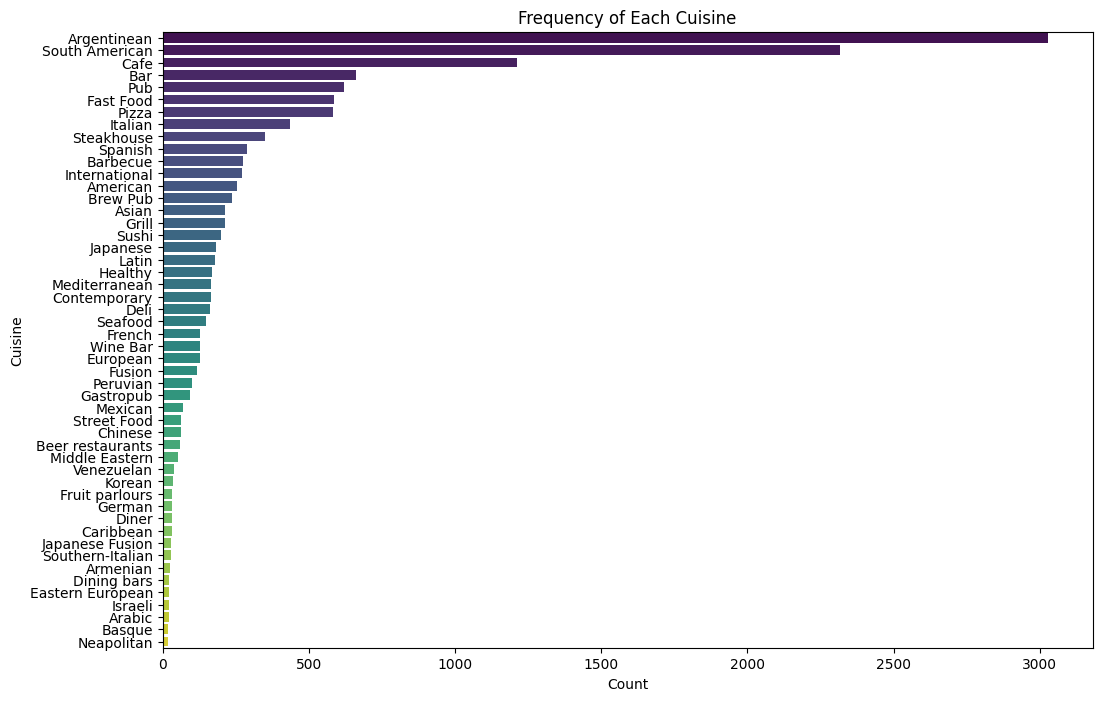

In [91]:
# Grafica con Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=cuisine_counts_df[cuisine_counts_df["Count"]>15], x='Count', y='Cuisine', palette='viridis')
plt.title('Frequency of Each Cuisine')
plt.xlabel('Count')
plt.ylabel('Cuisine')
plt.show()